In [13]:
import torch; import sklearn

# 1. Carregar dados
iris = sklearn.datasets.load_iris()

X = iris.data           # 4 features: largura da sépalas, largura da pétalas, comprimeto da sépalas e comprimento da pétalas

# Cria um array booleano baseado no rotulo das 150 entradas do dataset
y = (iris.target == 1).astype(float)  # 1 se Versicolor, 0 caso contrário

# temp = torch.tensor(y, dtype=torch.float32)
# print(temp.shape)

# 2. Preparar dados para pytorch
X = torch.tensor(X, dtype=torch.float32)
print(X.shape)

y = torch.tensor(y, dtype=torch.float32).view(-1, 1) # O view() ajusta o formato do tensor, o -1 idica para o Pytorch calcular a dimensão.
print(y.shape)

torch.Size([150, 4])
torch.Size([150, 1])


In [2]:
# Divisão
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 3. Definir modelo: regressão logística

# Define o modelo a ser utilizado
modelo = torch.nn.Linear(4, 1)  # 4 features → 1 saída (probabilidade de ser Versicolor)
# y = xA^T + b
# x é o tensor de entrada; A é a matrix de pesos encontrados pelo modelo; T transpoe a matrix A para o formato (4,1); b o vies; y a saida

# 4. Definir função de perda e algoritmo de otimização

funcao_perda = torch.nn.BCEWithLogitsLoss()  # combinação de sigmoid + BCE (Binary Cross Entropy)

# O otimizador ajusta os parâmetros do modelo para minimizar a funcao_perda; SGD() é o algoritmo que sera utilizado para a otimização;
# modelo.parameters() idica os parametros a serem otimizados; lr=0.1 é o tamanho do passo da atualização.
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.1)

In [4]:
# 5. Treino
for epoch in range(1000):
    optimizer.zero_grad() # reseta gradiente senão acumula
    outputs = modelo(X_train)
    loss = funcao_perda(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/100], Loss: {loss.item():.4f}")

Época [10/100], Loss: 0.6679
Época [20/100], Loss: 0.6316
Época [30/100], Loss: 0.6156
Época [40/100], Loss: 0.6073
Época [50/100], Loss: 0.6019
Época [60/100], Loss: 0.5980
Época [70/100], Loss: 0.5948
Época [80/100], Loss: 0.5919
Época [90/100], Loss: 0.5892
Época [100/100], Loss: 0.5867
Época [110/100], Loss: 0.5844
Época [120/100], Loss: 0.5821
Época [130/100], Loss: 0.5799
Época [140/100], Loss: 0.5778
Época [150/100], Loss: 0.5758
Época [160/100], Loss: 0.5739
Época [170/100], Loss: 0.5720
Época [180/100], Loss: 0.5702
Época [190/100], Loss: 0.5684
Época [200/100], Loss: 0.5667
Época [210/100], Loss: 0.5651
Época [220/100], Loss: 0.5636
Época [230/100], Loss: 0.5620
Época [240/100], Loss: 0.5606
Época [250/100], Loss: 0.5592
Época [260/100], Loss: 0.5578
Época [270/100], Loss: 0.5565
Época [280/100], Loss: 0.5552
Época [290/100], Loss: 0.5540
Época [300/100], Loss: 0.5528
Época [310/100], Loss: 0.5517
Época [320/100], Loss: 0.5506
Época [330/100], Loss: 0.5495
Época [340/100], Lo

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

with torch.no_grad():  # Desabilita o cálculo de gradientes, economizando RAM e tempo de processamento
    y_logits = modelo(X_test)

# 3. reduz o intervalo dos resultados do teste
y_pred_probs = torch.sigmoid(y_logits)

# 4. Converter tensores do PyTorch para arrays NumPy para a utilização do scikit-learn
y_test_np = y_test.numpy()
y_pred_probs_np = y_pred_probs.numpy()

Matriz de Confusão:
[[19  2]
 [ 5  4]]


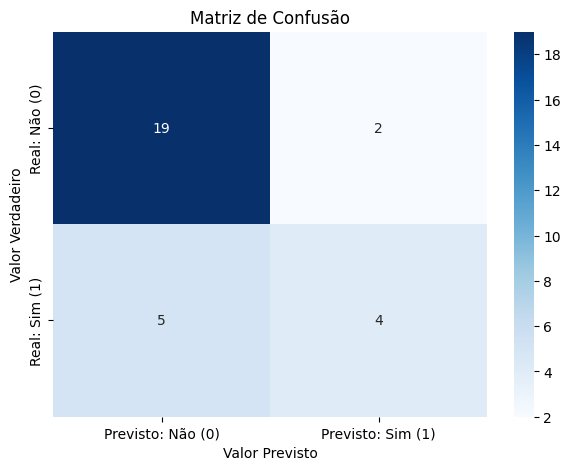

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_pred_classes = (y_pred_probs_np >= threshold).astype(int)

# 4. Calcular a matriz de confusão
cm = confusion_matrix(y_test_np, y_pred_classes)

print("Matriz de Confusão:")
print(cm)

# 5. Plotar a matriz de confusão com Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Não (0)', 'Previsto: Sim (1)'],
            yticklabels=['Real: Não (0)', 'Real: Sim (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

0.8148148148148149


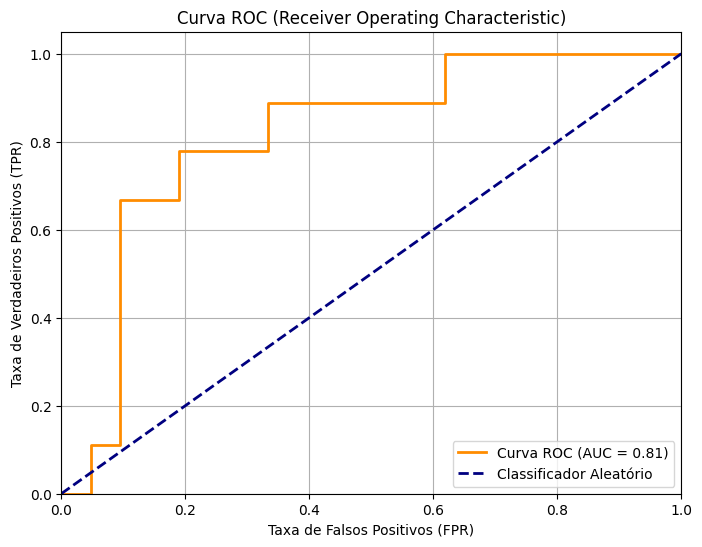

In [6]:
# 5. Calcular a pontuação AUC
# probabilidade do modelo, se receber um exemplo positivo e negativo escolhido aleatoriamente, classificar o positivo como melhor do que o negativo.
auc_score = roc_auc_score(y_test_np, y_pred_probs_np)
print(auc_score)

# 6. Calcular a curva ROC (FPR, TPR e thresholds)
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_probs_np)

# 7. Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório') # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score

In [12]:
acc_sklearn = accuracy_score(y_test_np, y_pred_classes)
print(acc_sklearn)

prec_sklearn = precision_score(y_test_np, y_pred_classes)
print(prec_sklearn)

0.7666666666666667
0.6666666666666666
